# Effects of China’s 2017 Large Shareholder Liquidity Regulation on Large Shareholders’ Pledging Behaviors

## Introduction

#### As China seeks to bring stability to the stock market and boost confidence amongst investors, they have constantly sought out pathways they felt confident would prevent large unpredictable movements of stocks by major shareholders. In May 2017, the Chinese government implemented another new policy which as translated from the Shanghai Stock Exchange’s documentation on the policy proposes that “The total number of shares liquidated shall not exceed 1% of the total number of shares of the company within any consecutive 90-day period if the majority shareholder or a specific shareholder reduces his or her holdings through centralized bidding trading.” This new policy has potentially brought about new issues that China did not predict would be the result of their policy. It is hypothesized that this policy has led to large shareholders seeking loopholes to circumvent the policy. The method that is believed to be the most common method of circumventing this policy is that of using one’s stake in the company as collateral on a loan. The investor seeks out a financial institution willing to give the investor a loan with the investor’s stake in a company as collateral. The investor can then default on the loan, keeping the money and giving up all the pledged stocks to the financial institution. This type of activity can be associated with causing share prices to drop and causing the very unrest and instability the policy was meant to limit.

#### Our group’s proposal and purpose is to research whether or not this recently implemented policy has led to changes in large shareholders’ handling of their stock, and more specifically whether there has been an increase in stock being used as collateral for loans amongst large shareholders. It’s also within our interests to see if there is a correlation between the higher number of shares a large shareholder has and the likelihood to engage in using stock as collateral to borrow money. The hypothesis is that the regulation has affected the behaviors of large shareholders pledging their stocks and the therefore the null hypothesis would be that we fail to find that the new regulation has an effect of large shareholders’ pledging behaviors. In addition to this, there are other factors that may impact an individual's’ decision to pledge like their age, industry, etc.

## Line Chart & Correlation Analysis

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
import statsmodels.formula.api as smapi

In [3]:
df=pd.read_csv("Data/Shareholding_Ratio_Pledge_Ratio.csv",header=[0,1]) 

In [4]:
df.shape

(65, 9)

In [5]:
df.head()

Quarter             2018Q2                          2017Q2               \
     Name Shareholding_Ratio Pledge_Ratio Shareholding_Ratio Pledge_Ratio   
0     肖文革              44.04       100.00              65.17        81.47   
1     俞龙生               4.33         0.00               4.33         0.00   
2     赵瑞海              32.65        63.56              33.15         0.00   
3     赵瑞宾              31.96        61.18              32.44         0.00   
4     赵瑞杰               7.17        96.47               7.28         0.00   

              2017Q1                          2016Q2               
  Shareholding_Ratio Pledge_Ratio Shareholding_Ratio Pledge_Ratio  
0              65.17        83.89              65.17        55.87  
1               4.33         0.00              18.23         0.00  
2              33.15         0.00              33.15         0.00  
3              32.44         0.00              32.44         0.00  
4               7.28         0.00               7.28         0.00

In [6]:
mean=df.mean()

In [7]:
print(mean)

2018Q2  Shareholding_Ratio    18.011846
        Pledge_Ratio          79.292615
2017Q2  Shareholding_Ratio    18.883385
        Pledge_Ratio          58.994308
2017Q1  Shareholding_Ratio    18.968923
        Pledge_Ratio          52.157692
2016Q2  Shareholding_Ratio    20.154615
        Pledge_Ratio          36.920154
dtype: float64


In [8]:
#数据反转
mean.iloc[::-1]

2016Q2  Pledge_Ratio          36.920154
        Shareholding_Ratio    20.154615
2017Q1  Pledge_Ratio          52.157692
        Shareholding_Ratio    18.968923
2017Q2  Pledge_Ratio          58.994308
        Shareholding_Ratio    18.883385
2018Q2  Pledge_Ratio          79.292615
        Shareholding_Ratio    18.011846
dtype: float64

In [9]:
average=mean.iloc[::-1].unstack()

In [10]:
print(average)

        Pledge_Ratio  Shareholding_Ratio
2016Q2     36.920154           20.154615
2017Q1     52.157692           18.968923
2017Q2     58.994308           18.883385
2018Q2     79.292615           18.011846


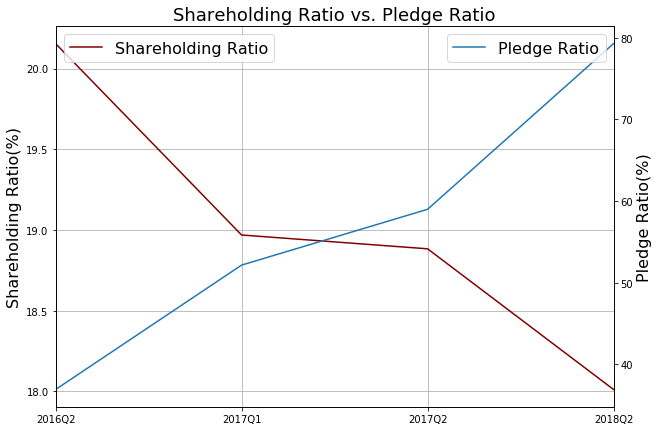

In [11]:
ax1 = average.Shareholding_Ratio.plot(
    figsize=(10, 7),
    grid=True,
    color='maroon'
)
plt.title('Shareholding Ratio vs. Pledge Ratio',fontsize=18)
ax1.set_ylabel('Shareholding Ratio(%)',fontsize=16)

plt.legend(labels = ['Shareholding Ratio'], loc = 'upper left', fontsize=16)

ax2 = ax1.twinx()
ax2.plot(average.Pledge_Ratio)

ax2.set_ylabel('Pledge Ratio(%)',fontsize=16)
plt.legend(labels = ['Pledge Ratio'], loc = 'upper right', fontsize=16)

plt.show()


#### The graph depicts the shareholding ratio going down while the pledge ratio goes up. The two variables are negatively correlated.

In [12]:
corr=average.corr()

In [13]:
print(corr)

                    Pledge_Ratio  Shareholding_Ratio
Pledge_Ratio            1.000000           -0.975541
Shareholding_Ratio     -0.975541            1.000000


#### They are approximately 97% negatively correlated.

## Scatter Plot

Text(0.5, 1.0, 'Shareholding Ratio vs. Pledge Ratio scatter plot')

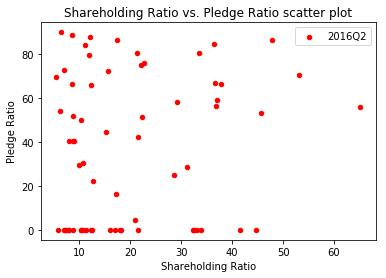

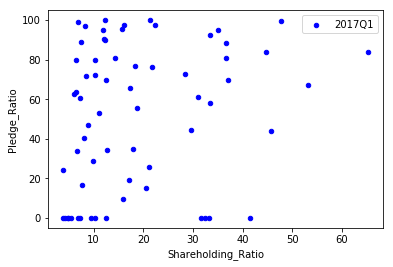

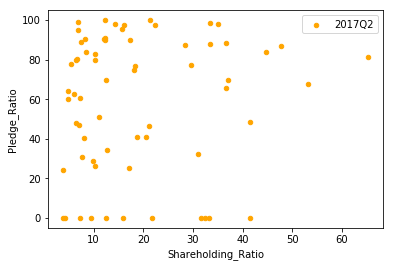

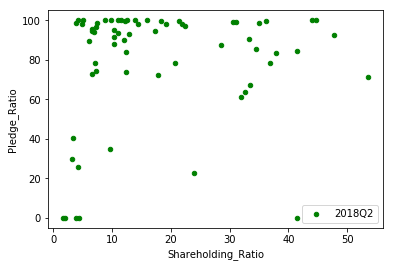

In [14]:
ax = df['2016Q2'].plot.scatter(
    x='Shareholding_Ratio',
    y='Pledge_Ratio',
    label="2016Q2",
    color='red',
)
df['2017Q1'].plot.scatter(
    x='Shareholding_Ratio',
    y='Pledge_Ratio',
    label="2017Q1",
    color='blue',
)
df['2017Q2'].plot.scatter(
    x='Shareholding_Ratio',
    y='Pledge_Ratio',
    label="2017Q2",
    color='orange',
)
df['2018Q2'].plot.scatter(
    x='Shareholding_Ratio',
    y='Pledge_Ratio',
    label="2018Q2",
    color='green',
)
ax.set_ylabel('Pledge Ratio')
ax.set_xlabel('Shareholding Ratio')
ax.set_title('Shareholding Ratio vs. Pledge Ratio scatter plot')



In these scatterplots which depict the trend for the pledge and shareholding ratios. In 2016, it seems the higher an individual’s shareholding ratio is, the lower their pledge ratio will be. However, this trend flips to becoming a higher shareholding ratio being positively correlated with a higher pledge ratio in 2017 and becomes much more extreme in 2018. This is curious because the new regulation had not yet been announced or in effect in 2017 Q1, yet there is already a trend reversal. One can guess that maybe there is secret information being passed to the large shareholders that preempted them to pledge their shares. It is probably an issue of interest to research to find more accurate information on what was occurring between 2016 and 2017 that may have caused this trend reversal. However, it is quite clear that in 2018, higher shareholding ratios quite positively correlate with higher pledge ratios. It is our conjecture that this trend spotted in 2018 is occurring largely as a result of the 2017 new regulation.



## Bar Plot

In [15]:
sh_df=pd.read_csv("Data/shareholder_age_industry.csv") 

In [16]:
sh_df.head()

,Shareholder,Age,Semiconductor,Technology_Hardware_and_Equipment,Software_and_Services,Pharmaceutical_Biotechnology_and_Life_Sciences,Media,Automotive_and_Auto_Parts,Durable_Consumer_Goods_and_Clothing,Retail,Business_and_Professional_Services,Capital_Goods,Real_Estate,Food_Beverages_and_Tobacco
0,肖文革,51,0,0,0,0,1,0,0,0,0,0,0,0
1,俞龙生,58,0,0,0,0,0,0,0,0,0,1,0,0
2,赵瑞海,53,0,0,0,0,0,0,1,0,0,0,0,0
3,赵瑞宾,54,0,0,0,0,0,0,1,0,0,0,0,0
4,赵瑞杰,44,0,0,0,0,0,0,1,0,0,0,0,0


In [17]:
bins=[24,34,44,54,64,74,84]
labels=['25-34','35-44','45-54','55-64','65-74','75-84']
age_cut=pd.cut(sh_df.Age,bins,labels=labels)
sh_df['age_group']=age_cut
sh_df.groupby(by=['age_group'])['Shareholder'].agg({'total':np.size})

C:\Users\Fanlin C\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """


,total
age_group,
25-34,3
35-44,6
45-54,40
55-64,12
65-74,3
75-84,1


In [18]:
sh_df.head()

,Shareholder,Age,Semiconductor,Technology_Hardware_and_Equipment,Software_and_Services,Pharmaceutical_Biotechnology_and_Life_Sciences,Media,Automotive_and_Auto_Parts,Durable_Consumer_Goods_and_Clothing,Retail,Business_and_Professional_Services,Capital_Goods,Real_Estate,Food_Beverages_and_Tobacco,age_group
0,肖文革,51,0,0,0,0,1,0,0,0,0,0,0,0,45-54
1,俞龙生,58,0,0,0,0,0,0,0,0,0,1,0,0,55-64
2,赵瑞海,53,0,0,0,0,0,0,1,0,0,0,0,0,45-54
3,赵瑞宾,54,0,0,0,0,0,0,1,0,0,0,0,0,45-54
4,赵瑞杰,44,0,0,0,0,0,0,1,0,0,0,0,0,35-44


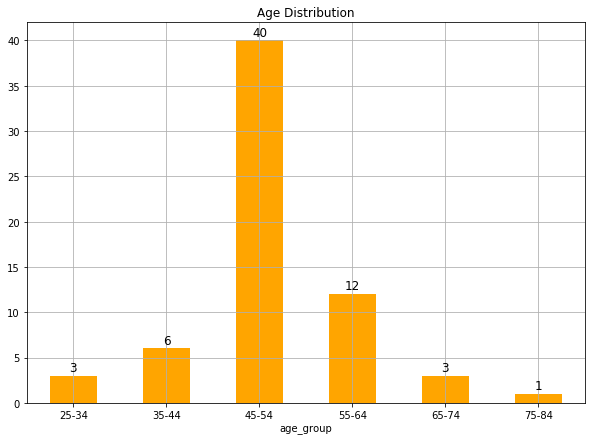

In [19]:
ax_age = sh_df.groupby('age_group').count()['Shareholder'].plot(
kind='bar',
color='orange',
grid=True,
figsize=(10, 7),
title='Age Distribution',
)

ax_age.text(0, 3.5, '3',ha='center',size=12)
ax_age.text(1, 6.5, '6',ha='center',size=12)
ax_age.text(2, 40.5, '40',ha='center',size=12)
ax_age.text(3, 12.5, '12',ha='center',size=12)
ax_age.text(4, 3.5, '3',ha='center',size=12)
ax_age.text(5, 1.5, '1',ha='center',size=12)

pl.xticks(rotation=360)
plt.show()


### The people with the highest pledging potential are concentrated in the 45-54 years old group.

## Pie Chart

In [20]:
sh_df.columns

Index(['Shareholder', 'Age', 'Semiconductor',
       'Technology_Hardware_and_Equipment', 'Software_and_Services',
       'Pharmaceutical_Biotechnology_and_Life_Sciences', 'Media',
       'Automotive_and_Auto_Parts', 'Durable_Consumer_Goods_and_Clothing',
       'Retail', 'Business_and_Professional_Services', 'Capital_Goods',
       'Real_Estate', 'Food_Beverages_and_Tobacco', 'age_group'],
      dtype='object')

In [21]:
labels2=['Semiconductor',
       'Technology_Hardware_and_Equipment', 'Software_and_Services',
       'Pharmaceutical_Biotechnology_and_Life_Sciences', 'Media',
       'Automotive_and_Auto_Parts', 'Durable_Consumer_Goods_and_Clothing',
       'Retail', 'Business_and_Professional_Services', 'Capital_Goods',
       'Real_Estate', 'Food_Beverages_and_Tobacco']

In [22]:
industry=sh_df[['Semiconductor',
       'Technology_Hardware_and_Equipment', 'Software_and_Services',
       'Pharmaceutical_Biotechnology_and_Life_Sciences', 'Media',
       'Automotive_and_Auto_Parts', 'Durable_Consumer_Goods_and_Clothing',
       'Retail', 'Business_and_Professional_Services', 'Capital_Goods',
       'Real_Estate', 'Food_Beverages_and_Tobacco'
      ]].sum()

<function matplotlib.pyplot.show(*args, **kw)>

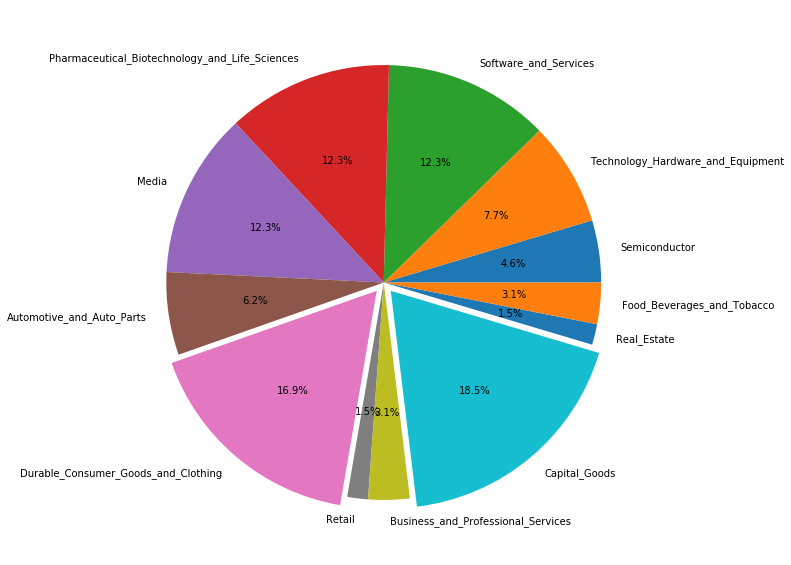

In [23]:
plt.figure(figsize=(10,10))

plt.pie(industry,labels=labels2,explode=(0, 0, 0, 0, 0, 0, 0.05, 0, 0, 0.05, 0, 0),autopct='%1.1f%%')
plt.show

#### 18.5%(12 companies) are in the capital goods industry.
#### 16.9%(11 companies) are in the durable consumer goods. 
#### We can see that pledging is not unique to any industry because every industry is pledging.

## Linear Regression Analysis

In [24]:
r8_df=pd.read_csv("Data/R8.csv") 

In [25]:
r8_df.head()

,pr,hr,fy,cage,age,dage,irr,sp,PE,mi,...,m,aap,dcgc,r,bps,cg,t,re,fbt,mats
0,0.558691,0.6517,2003,13,49,1,-17.558058,23.43,48.4377,2929.606,...,1,0,0,0,0,0,0,0,0,0
1,0.000000,0.1823,2001,15,56,1,-10.042954,43.98,351.9782,2929.606,...,0,0,0,0,0,1,0,0,0,0
2,0.000000,0.3315,1993,23,51,1,3.021361,16.00,0.0000,2929.606,...,0,0,1,0,0,0,0,0,0,0
3,0.000000,0.3244,1993,23,52,1,3.021361,16.00,0.0000,2929.606,...,0,0,1,0,0,0,0,0,0,0
4,0.000000,0.0728,1993,23,42,1,3.021361,16.00,0.0000,2929.606,...,0,0,1,0,0,0,0,0,0,0


#### pr = Pledge Ratio => Calculated using number of shares pledged divided by shares held.
#### hr = Shareholding Ratio => Percentage of company’s shares owned by the individual
#### fy = Founding Year => Year company was founded
#### age => Ages of individuals
#### dage => Dummy variable for individuals whose ages are estimated
#### irr = Interval Rate of Return
#### sp = Stock Price
#### PE = Price-Earnings Ratio
#### mi = Market Index => Shanghai Composite
#### np = China’s New Large Shareholder Regulation in 2017 => Dummy variable for policy’s implementation
#### sc => Dummy variable for semiconductor industry sector
#### the => Dummy variable for technology, hardware, and equipment industry sector
#### ss => Dummy variable for software and services industry sector
#### u => Dummy variable for utilities industry sector
#### pbls => Dummy variable for pharmacy, biotechnology, and life science industry sector
#### hes => Dummy variable for healthcare, equipment, and services industry sector
#### m => Dummy variable for media industry sector
#### aap => Dummy variable for automotive and auto parts industry sector
#### dcgc => Dummy variable for durable consumer goods and clothing industry sector
#### r => Dummy variable for retail industry sector
#### bps => Dummy variable for business and professional services industry sector
#### cg => Dummy variable for capital goods industry sector
#### t => Dummy variable for transportation industry sector
#### re => Dummy variable for real estate industry sector
#### fbt => Dummy variable for food, beverages, and tobacco industry sector
#### mats => Dummy variable for materials industry sector


In [26]:
lm=smapi.ols(formula="pr~hr+cage+age+irr+sp+np",data=r8_df).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pr   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     11.38
Date:                Thu, 05 Sep 2019   Prob (F-statistic):           2.91e-11
Time:                        00:59:19   Log-Likelihood:                -76.680
No. Observations:                 260   AIC:                             167.4
Df Residuals:                     253   BIC:                             192.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8848      0.147      6.036      0.000       0.596       1.173
hr             0.2999      0.151      1.981      0.049       0.002       0.598
cage          -0.0093      0.005     -2.015      0.045      -0.018      -0.000
age           -0.0059      0.002     -2.409      0.017      -0.011      -0.001
irr           -0.0032      0.001     -2.792      0.006      -0.005      -0.001
sp            -0.0021      0.001     -1.800      0.073      -0.004       0.000
np             0.1887      0.046      4.145      0.000       0.099       0.278
==============================================================================
Omnibus:                       34.675   Durbin-Watson:                   1.483
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.758
Skew:                          -0.338   Prob(JB):                      0.00103
Kurtosis:                       2.099   Cond. No.                         500.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### From our regression, we found that most of our variables are significant at a 5% significance level in affecting the pledge ratio of individuals. 
#### The higher a large shareholders shareholding ratio is, the more likely they are to pledge as depicted with the variable having a .299871 coefficient. In theory, the new policy is more likely to affect individuals with higher shareholding ratios because it creates a limit on how quickly they can liquidate their shares, meaning that those with higher shareholding ratios would require a longer time to liquidate their shares. To circumvent this, pledging is one of the major options that they can engage in to increase liquidity. 
#### The age of a company also seems to play a role in the decision to pledge. This is potentially due to the notion that older more established companies may not need to be aggressively trying to grow their business by pledging shares to get capital to invest in the business whilst younger companies like companies which were founded due to the technology industry boom in the 2000s may still be aggressively trying to grow their companies. 
#### Contrary to what was previously expected, age of individuals seems to play a negative role in an individual’s decision to pledge. Initially, our group expected that as a large shareholder got older, it would increase their urgency of needing to liquidate their assets so they can essentially enjoy the benefits of their net worth. However, in our regression, we find that being younger leads to having a higher pledge ratio. This can potentially be explained by the data, because we see the individuals with the highest pledge ratios around the age of 50. At the age of 50, a successful individual may potentially be considering an early retirement and thus, to gain the most immediate benefit from their investments/shares held, they may opt to pledge their shares, take the money, and exit the business world. 
#### Interval rate of return is a frequently utilized indicator of how a business is performing in China. From what our regression finds, it seems to fit in with what should theoretically be happening. If a company is doing well, having a higher interval rate of return, the large shareholders would be less likely to pledge because pledging at a later date may bring them more value because the company is doing better, thus stock prices should also be higher. On the topic of stock prices, our regression found that stock prices we had in our data were not statistically significant. This can potentially be explained by the fact that our data only utilized four days of stock price data which was not enough to find a significant effect. 
#### The new policy, which is one of the major focuses of our paper was found to be an extremely significant factor in large shareholders’ decision to pledge. Since this new policy implements liquidity reductions to the shares held by large shareholders, it is highly motivating them to pledge because under the new regulation a large shareholder will most likely only be able to liquidate a total of 4% of a company’s total shares per year. By pledging shares, a large shareholder with a 20% shareholding ratio would essentially be able to instantly liquidate all their shares, although the value they receive is potentially lower than if they slowly liquidated under the new policy’s guidelines. In the previous sentence, it’s mentioned that the value received is potentially lower. This is an extremely important aspect because the new policy was implemented to increase confidence in the market and bring stability to the market. Large shareholders may view this policy as concrete evidence that markets are in fact not stable and therefore have little to no confidence in the stock market. If this is the case, large shareholders expect the market to go down, thus their expected value for slowly liquidating shares according to the new policy’s guidelines may in fact be lower than their expected value of pledging and quickly liquidating their shares.